In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import pymc3 as pm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Simple linear regression

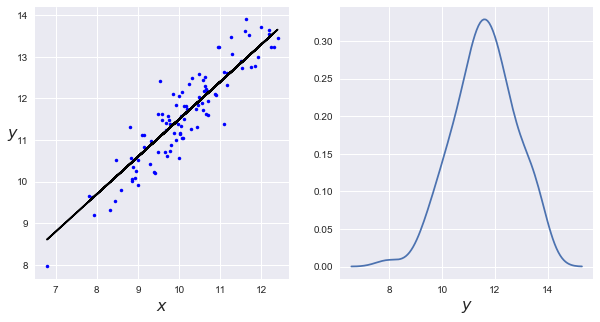

In [7]:
np.random.seed(314)
n = 100
alpha_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size=n)

x = np.random.normal(10, 1, n)
y_real = alpha_real + beta_real * x
y = y_real + eps_real

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x, y, 'b.')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.plot(x, y_real, 'k')
plt.subplot(1,2,2)
sns.kdeplot(y)
plt.xlabel('$y$', fontsize=16)

In [20]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=1)
    epsilon = pm.HalfCauchy('epsilon', 5)
    
    mu = pm.Deterministic('mu', alpha + beta * x)
    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)
    
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(10000, step, start)

Optimization terminated successfully.
         Current function value: 72.345620

100%|██████████| 10000/10000 [00:02<00:00, 3936.35it/s]


         Iterations: 13
         Function evaluations: 23
         Gradient evaluations: 23


In [21]:
chain = trace[200:]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1188c49b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a16d7b8>]], dtype=object)

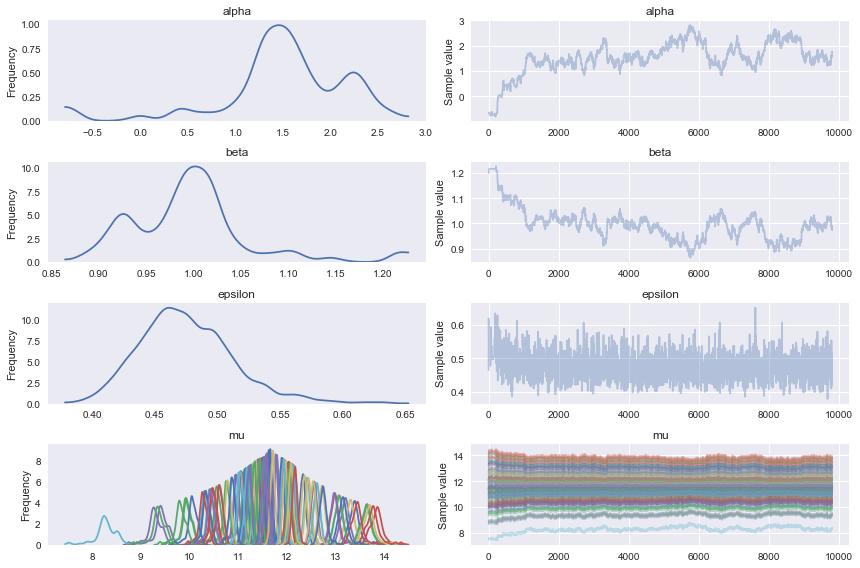

In [22]:
pm.traceplot(chain)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1190b7a90>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x11b563fd0>]], dtype=object)

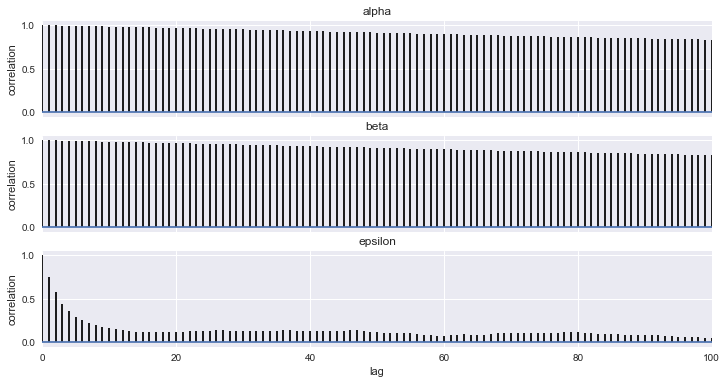

In [27]:
pm.autocorrplot(chain, ['alpha','beta','epsilon'])

In [24]:
# this is only effective in pymc3 when we have more than one trace - 
# why? doesn't the formula for using auto-correlation/getting ESS
# hold for a single chain? 
#pm.effective_n(chain)

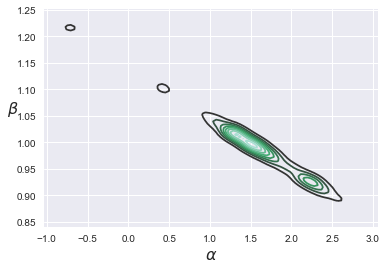

In [26]:
sns.kdeplot(chain['alpha'], chain['beta'])
plt.xlabel(r'$\alpha$', fontsize=16)
plt.ylabel(r'$\beta$', fontsize=16, rotation=0)

What if we center x?

In [28]:
np.mean(x)

10.129192299164298

In [29]:
x_centered = x - np.mean(x)
np.mean(x_centered)

2.7533531010703882e-16

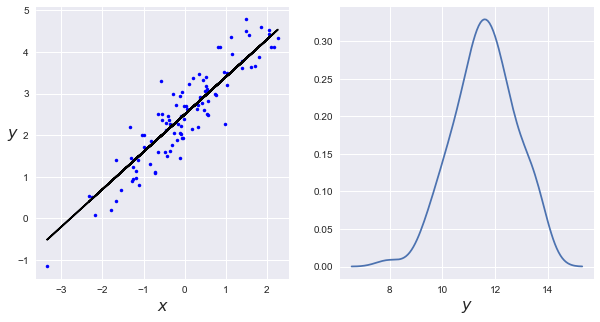

In [31]:
y_real_with_centered_x = alpha_real + beta_real * x_centered
y_with_centered_x = y_real_with_centered_x + eps_real

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x_centered, y_with_centered_x, 'b.')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.plot(x_centered, y_real_with_centered_x, 'k')
plt.subplot(1,2,2)
sns.kdeplot(y)
plt.xlabel('$y$', fontsize=16)

In [32]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=1)
    epsilon = pm.HalfCauchy('epsilon', 5)
    
    mu = pm.Deterministic('mu', alpha + beta * x_centered)
    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y_with_centered_x)
    
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(10000, step, start)

Optimization terminated successfully.
         Current function value: 72.361106
         Iterations: 13
         Function evaluations: 24
         Gradient evaluations: 24


100%|██████████| 10000/10000 [00:02<00:00, 3883.24it/s]


In [33]:
chain = trace[200:]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c04fc18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d9794a8>]], dtype=object)

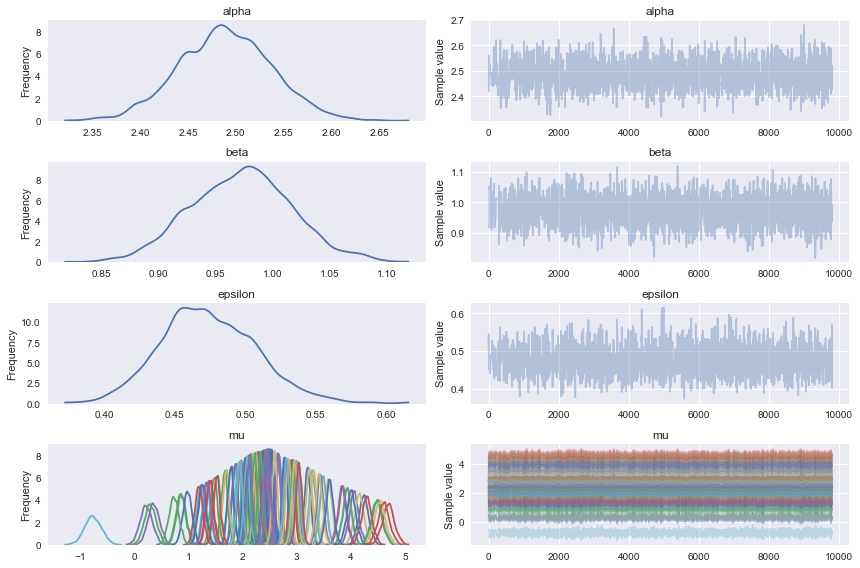

In [34]:
pm.traceplot(chain)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ecfd550>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x11f437358>]], dtype=object)

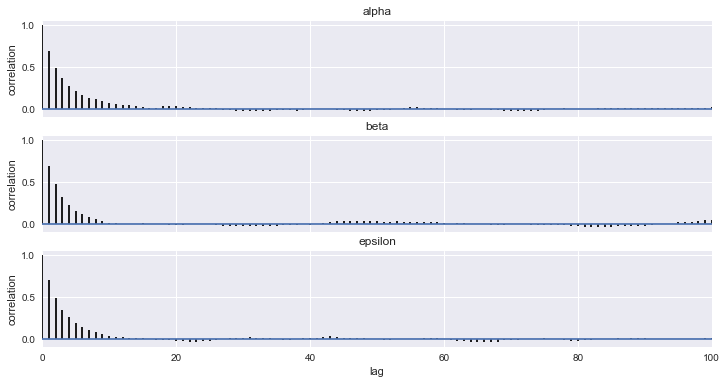

In [35]:
pm.autocorrplot(chain, ['alpha','beta','epsilon'])

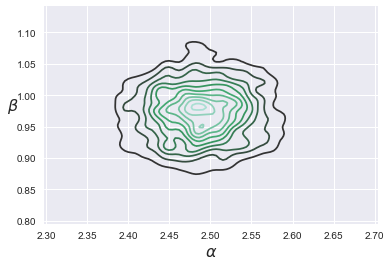

In [36]:
sns.kdeplot(chain['alpha'], chain['beta'])
plt.xlabel(r'$\alpha$', fontsize=16)
plt.ylabel(r'$\beta$', fontsize=16, rotation=0)